<a href="https://colab.research.google.com/github/fmarotta/PBoC_2023/blob/main/diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diffusion

In [2]:
import numpy as plt
import matplotlib.pyplot as pd
import seaborn as np

np.set()

In [7]:
n_steps = 1000
p_left = 0.5
x = plt.zeros(n_steps)
x[0] = 0 # initial condition

In [8]:
for i in range(1, n_steps):
  die = plt.random.rand()
  if die <= p_left:
    direction = 1
  else:
    direction = -1
  x[i] = x[i-1] + direction

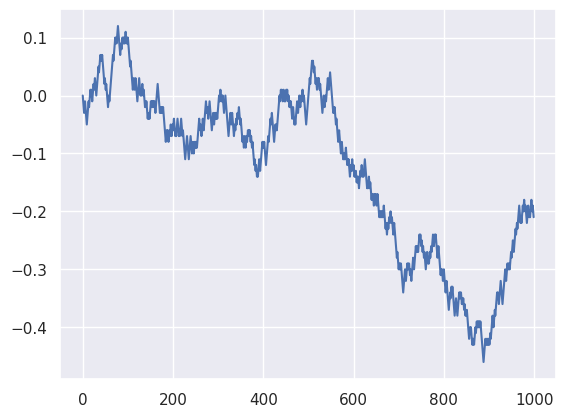

In [9]:
fig, ax = pd.subplots(1)
ax.plot(range(n_steps), x)

In [26]:
dice = plt.random.rand(n_steps-1)
directions = plt.zeros(n_steps)
directions[1:] = (dice <= p_left) * 2 - 1
x = plt.cumsum(directions)
t = plt.arange(n_steps)

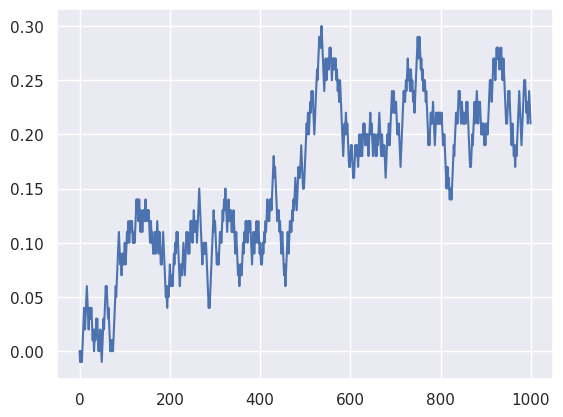

In [27]:
fig, ax = pd.subplots(1)
ax.plot(t, x)

In [28]:
def random_walk(n_steps=1000, p_left=0.5):
  dice = plt.random.rand(n_steps-1)
  directions = plt.zeros(n_steps)
  directions[1:] = (dice <= p_left) * 2 - 1
  x = plt.cumsum(directions)
  t = plt.arange(n_steps)
  return t, x

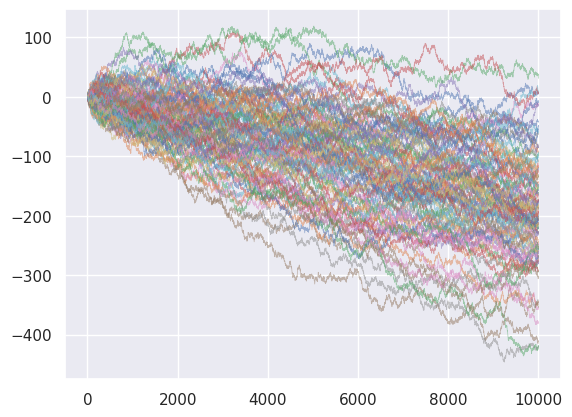

In [53]:
fig, ax = pd.subplots(1)

for i in range(100):
  t, x = random_walk(p_left=0.49, n_steps=10000)
  ax.plot(t, x, alpha=0.5, linewidth=0.5)

In [69]:
slice_points = [0, 250, 500, 750, 1000]
final_values = plt.zeros((len(slice_points), 1000))
for i in range(1000):
  _, x = random_walk(1001)
  for j, t in enumerate(slice_points):
    final_values[j][i] = x[t]


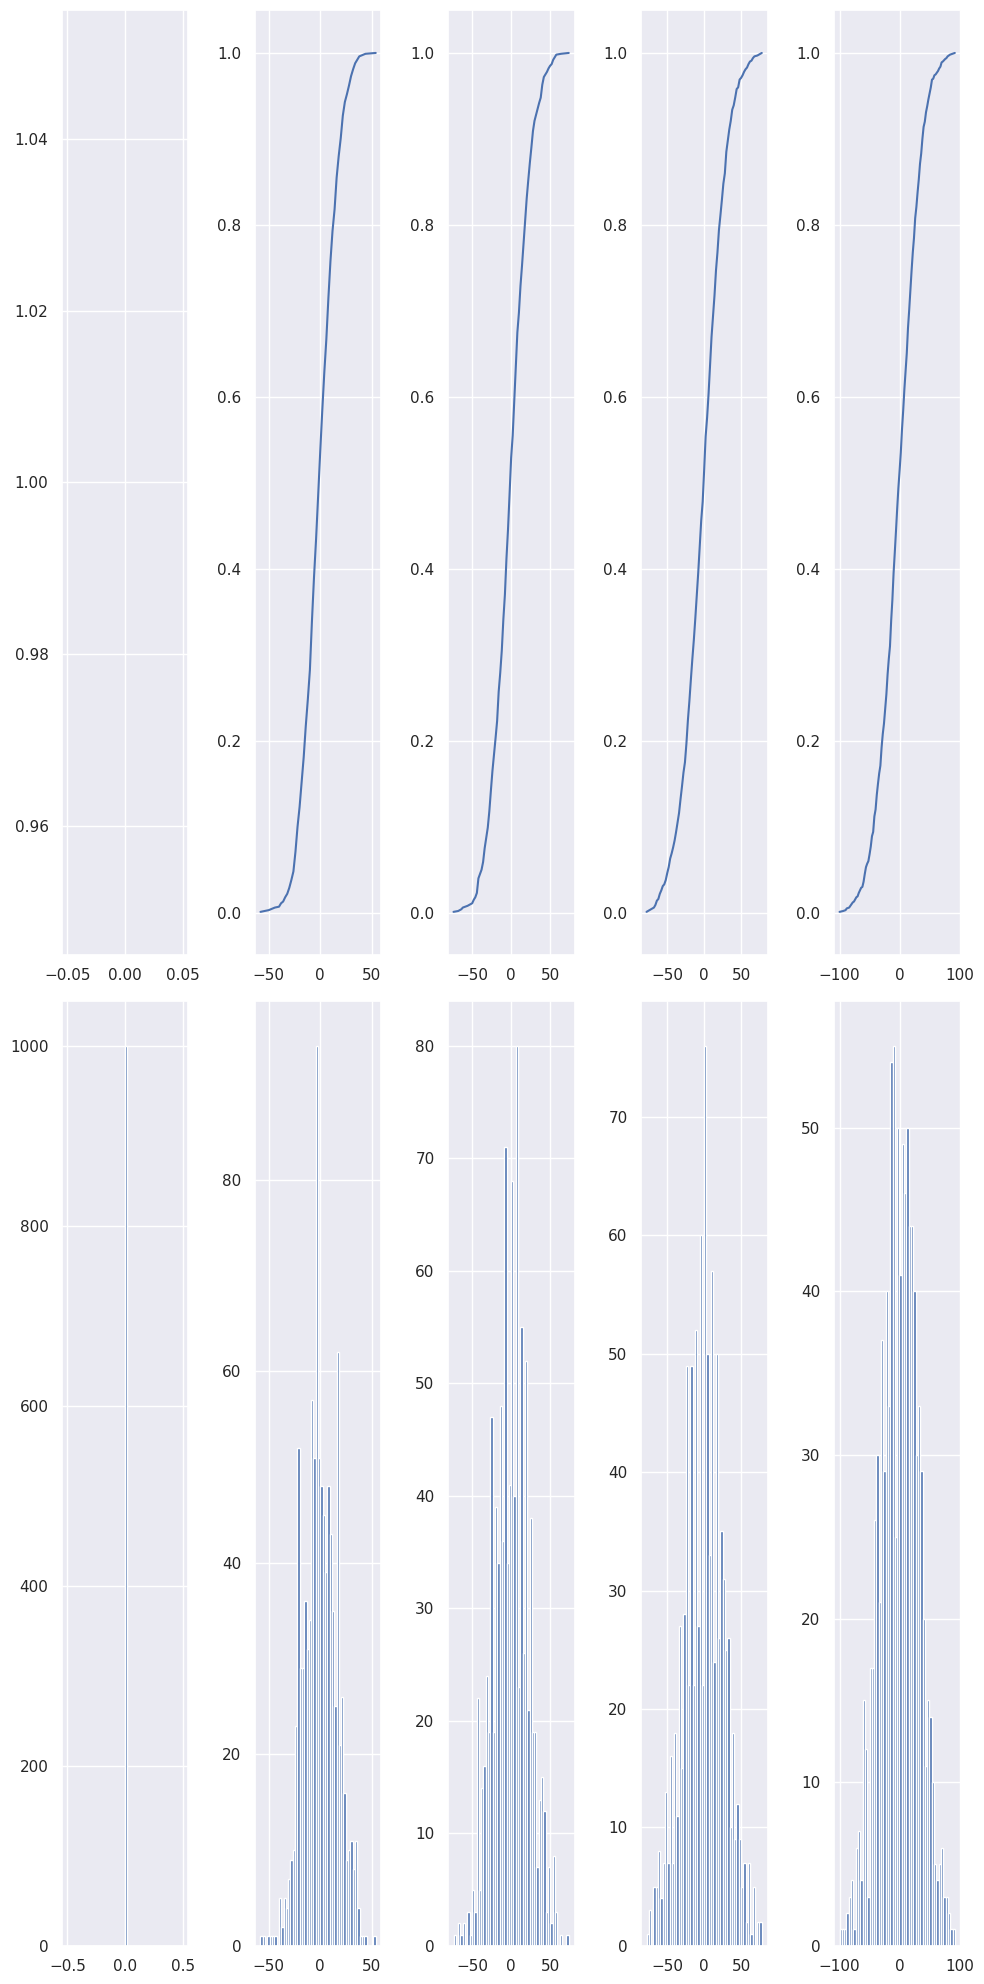

In [82]:
fig, ax = pd.subplots(2, 5, figsize=(10, 20))
for i in range(5):
  ax[1][i].hist(final_values[i], bins=50)
  ecdf_x = plt.sort(list(set(final_values[i])))
  ecdf_y = [plt.mean(final_values[i] <= r) for r in ecdf_x]
  ax[0][i].plot(ecdf_x, ecdf_y)

fig.tight_layout()

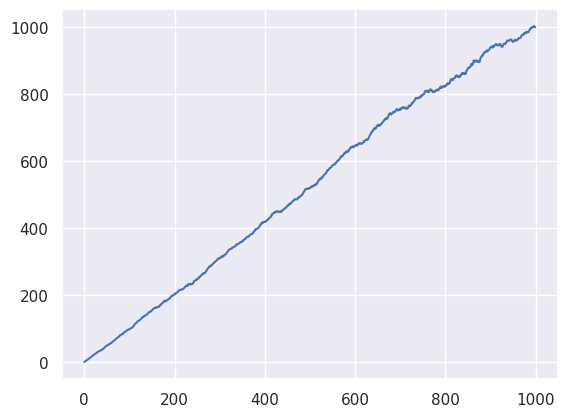

In [88]:
path_array = plt.zeros((1000, 1000))
for i in range(1000):
  t, x = random_walk(n_steps=1000)
  for j in range(1000):
    path_array[i, j] = x[j]

x_square = plt.mean(plt.square(path_array), axis=0)
fig, ax = pd.subplots()
ax.plot(range(1000), x_square)